In [384]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import requests
import pickle
import os

In [387]:
edgelist = pd.read_pickle('bot/edgelist_2_edges_from_start_1004764640486854656.pkl')
edgelist.head()

originating_id         receiving_id originating_following_count  \
2             762272618  1004764640486854656                         217   
3              66214387  1004764640486854656                         252   
2   1004764640486854656             66214387                         NaN   
3   1004764640486854656            762272618                         NaN   
37  1004764640486854656  1013126951920439296                         NaN   

   originating_follower_count receiving_following_count  \
2                         414                       NaN   
3                         848                       NaN   
2                         NaN                       252   
3                         NaN                       217   
37                        NaN                       398   

   receiving_follower_count  
2                       NaN  
3                       NaN  
2                       848  
3                       414  
37                      347

In [484]:
edgelist = pd.read_pickle('likes/human/likes_human_844779426260791296')
#edgelist = pd.read_pickle('bot/edgelist_2_edges_from_start_1004764640486854656.pkl')
edgelist.head()

originating_id        receiving_id originating_following_count  \
0          1364362616  844779426260791296                        3720   
1          3906515918  844779426260791296                        9205   
2          2913482358  844779426260791296                         313   
3          2264478426  844779426260791296                         405   
4  839569538811191296  844779426260791296                          83   

  originating_follower_count  
0                        875  
1                       9152  
2                         24  
3                        120  
4                          7

In [486]:
pd.option_context('display.max_rows', None, 'display_max_columns', None)

In [488]:
# Convert id from string to int
edgelist.originating_id= edgelist.originating_id.astype(int) #.loc[edgelist.receiving_id == '844779426260791296']
edgelist.receiving_id = edgelist.receiving_id.astype(int)

G = nx.convert_matrix.from_pandas_edgelist(edgelist, 'originating_id', 'receiving_id', 
                                       create_using=nx.DiGraph())
nodelist = list(G.nodes)

In [489]:
# read in our label dataset and create list of all bots in gilani dataset
path = 'data/gilani-2017/gilani-2017.tsv'
df = pd.read_csv(path, sep='\t', header=None).rename(columns={0: "twitter_id", 1: 'label'})
bots = list(df.loc[df.label == 'bot', 'twitter_id'])  

# Create list of labels for bot (1) or human (0)
# if twitter id not in gilani dataset we assign it human label
node_labels = []
for node in nodelist:
    if node in bots:
        node_labels.append(1)
    else:
        node_labels.append(0)

In [490]:
# number of bots in this network
sum(node_labels)

1

bot
-----------------------


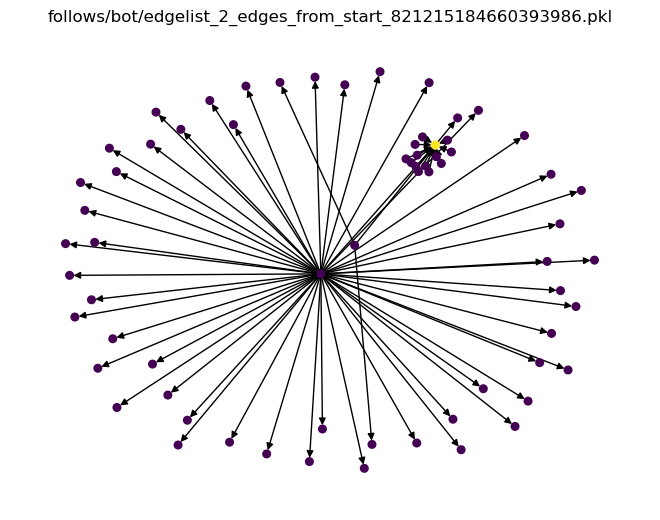

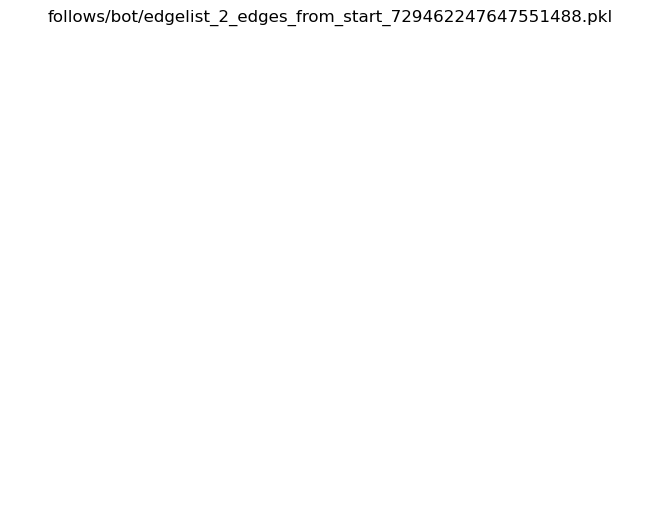

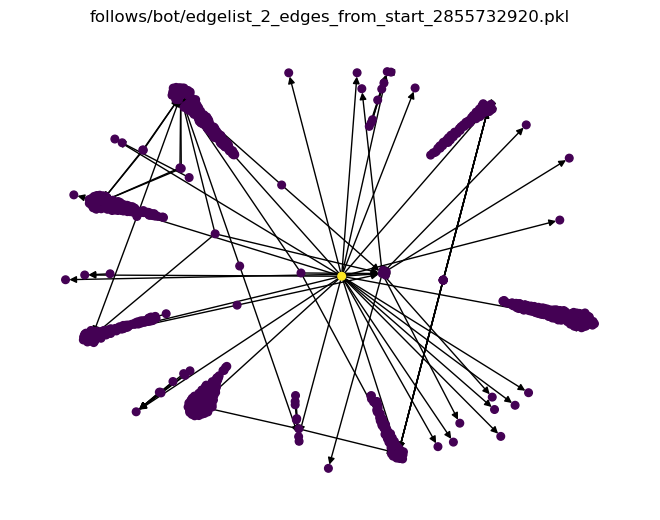

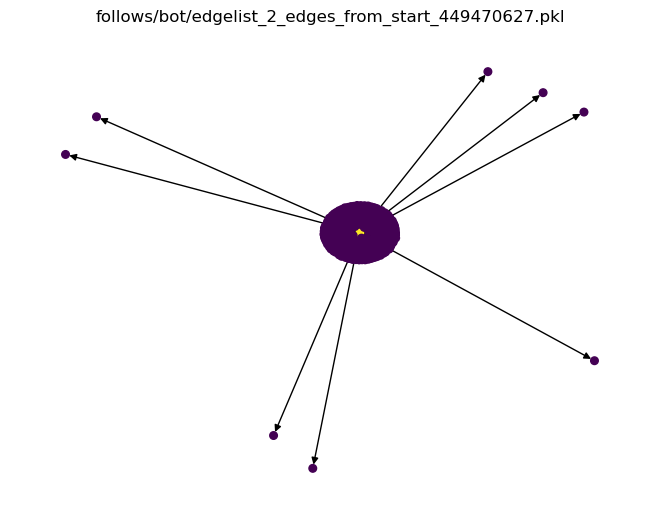

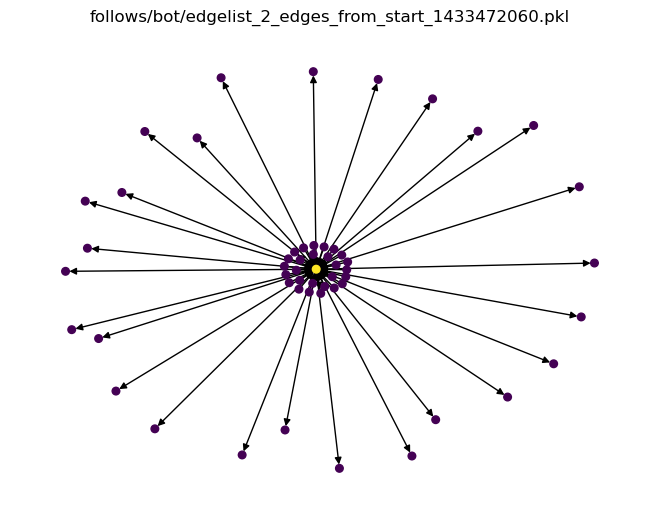

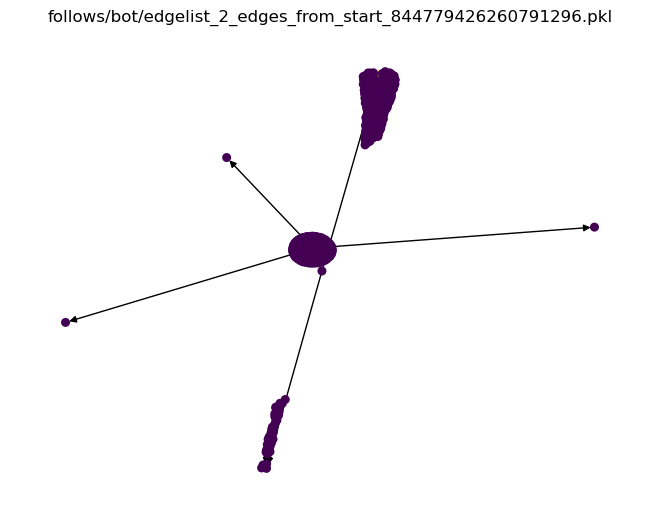

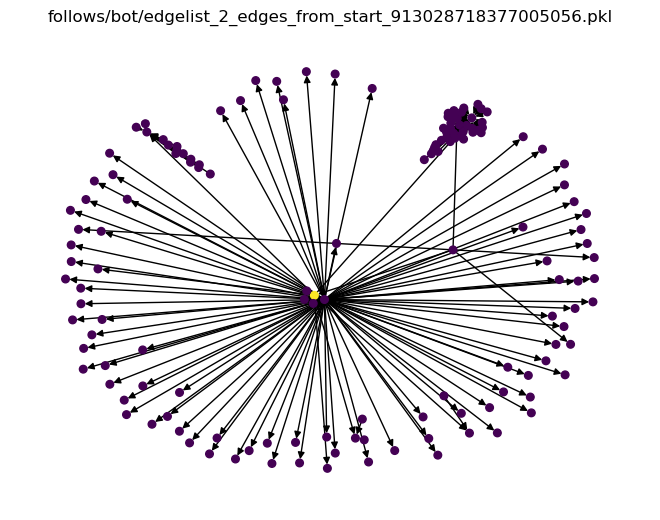

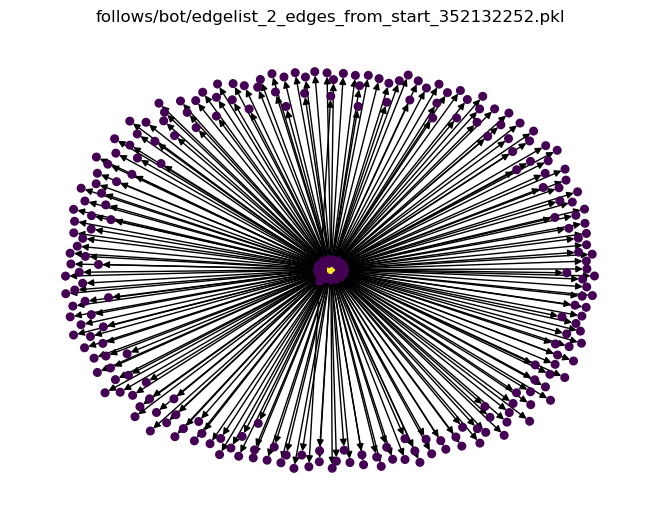

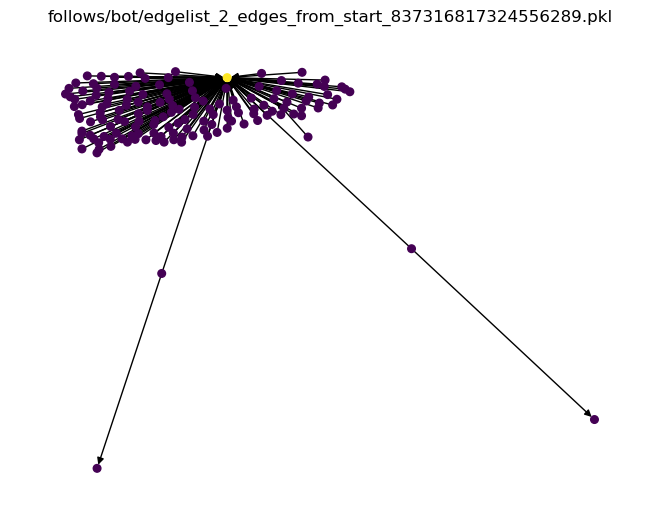

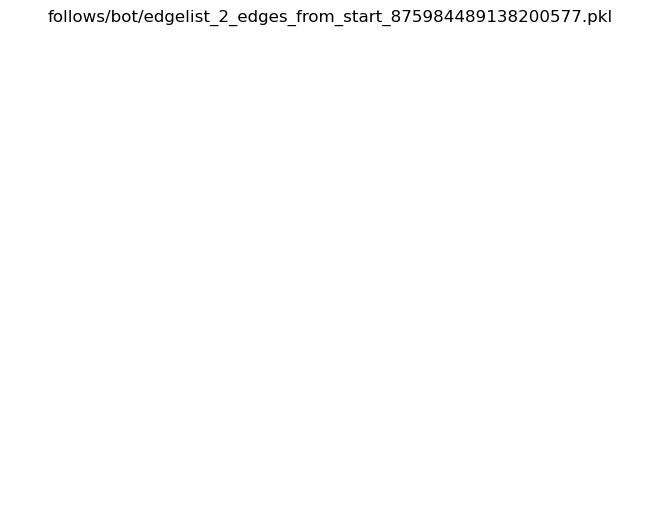

In [520]:
label = 'bot'
print(label)
print('-----------------------')
for name in os.listdir('follows/' + label)[10:20]:
    if os.path.isdir(name):
        continue
    path = 'follows/' + label + '/' + name
    edgelist = pd.read_pickle(path)
    
    
    # Convert id from string to int
    edgelist.originating_id= edgelist.originating_id.astype(int) #.loc[edgelist.receiving_id == '844779426260791296']
    edgelist.receiving_id = edgelist.receiving_id.astype(int)

    G = nx.convert_matrix.from_pandas_edgelist(edgelist, 'originating_id', 'receiving_id', 
                                           create_using=nx.DiGraph())

#     G = nx.convert_matrix.from_pandas_edgelist(edgelist, source='originating_id', 
#                                            target='receiving_id', 
#                                             edge_attr='edge_weight',
#                                            create_using=nx.DiGraph())
    nodelist = list(G.nodes)
    
    # Create list of labels for bot (1) or human (0)
    # if twitter id not in gilani dataset we assign it human label
    node_labels = []
    for node in nodelist:
        if node in bots:
            node_labels.append(1)
        else:
            node_labels.append(0)
    
#     rec = nx.algorithms.reciprocity(G)
#     print(rec)
#     print(path)
    try:
        node_labels = []
        for node in nodelist:
            if node in bots:
                node_labels.append(1)
            else:
                node_labels.append(0)

        plt.figure()

        nx.draw_spring(G, node_color=node_labels, node_size=30) 
        #plot_weighted_graph(G, nodelist)
        plt.title(path)
    except:
        print('hello')

human
-----------------------
0.029038112522686024
mentions/human/edgelist_mentions_365814947.pkl
0.0
mentions/human/edgelist_mentions_770774730190098433.pkl
0.0
mentions/human/edgelist_mentions_3367811173.pkl
0.04081632653061224
mentions/human/edgelist_mentions_1708812864.pkl
0.0
mentions/human/edgelist_mentions_2589923834.pkl


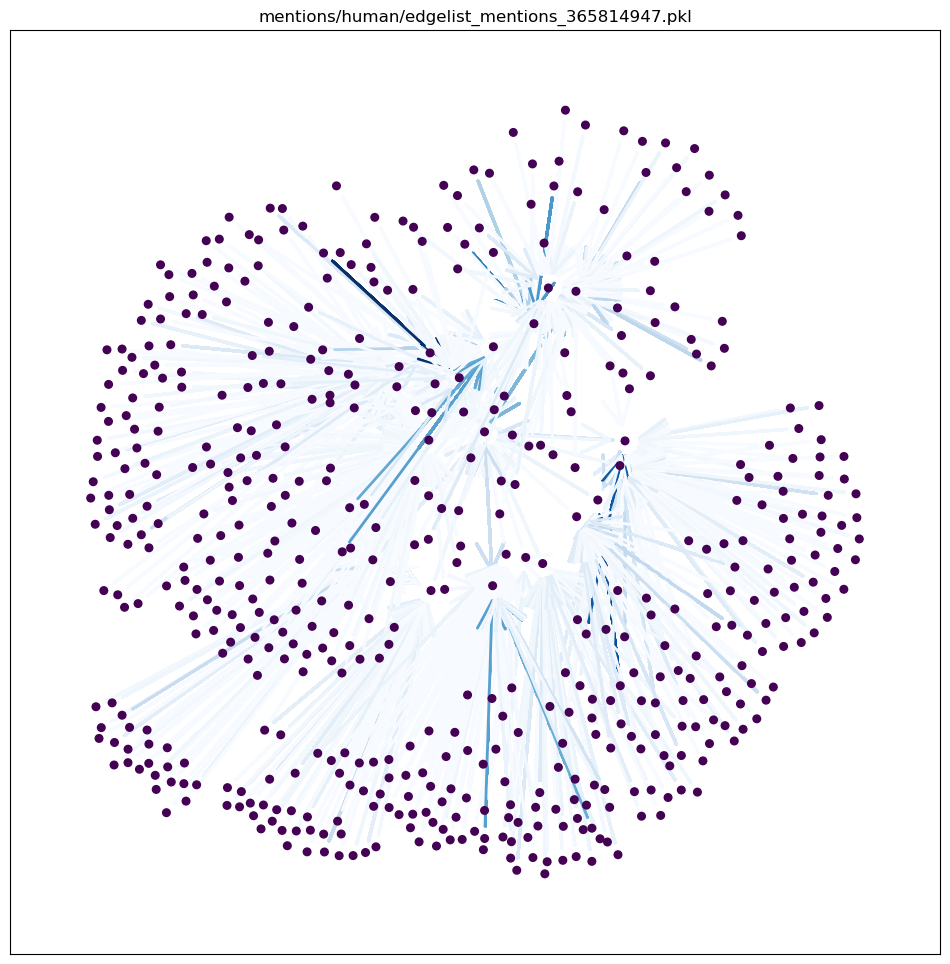

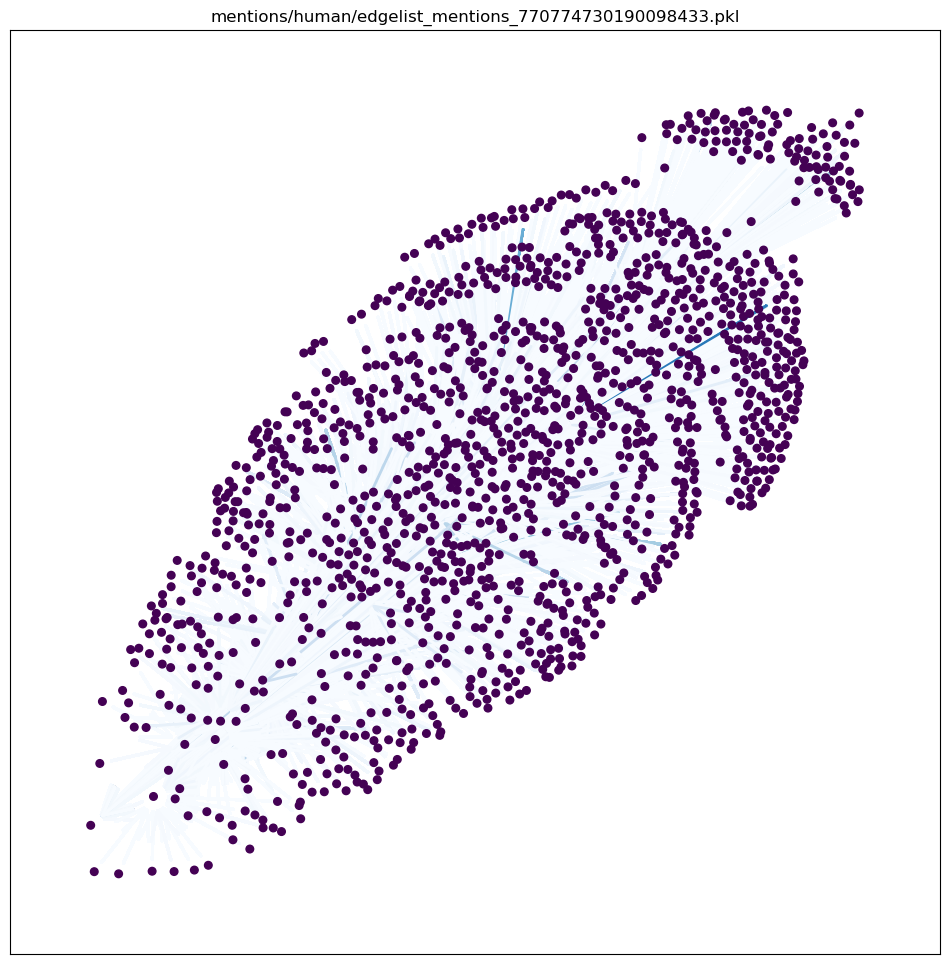

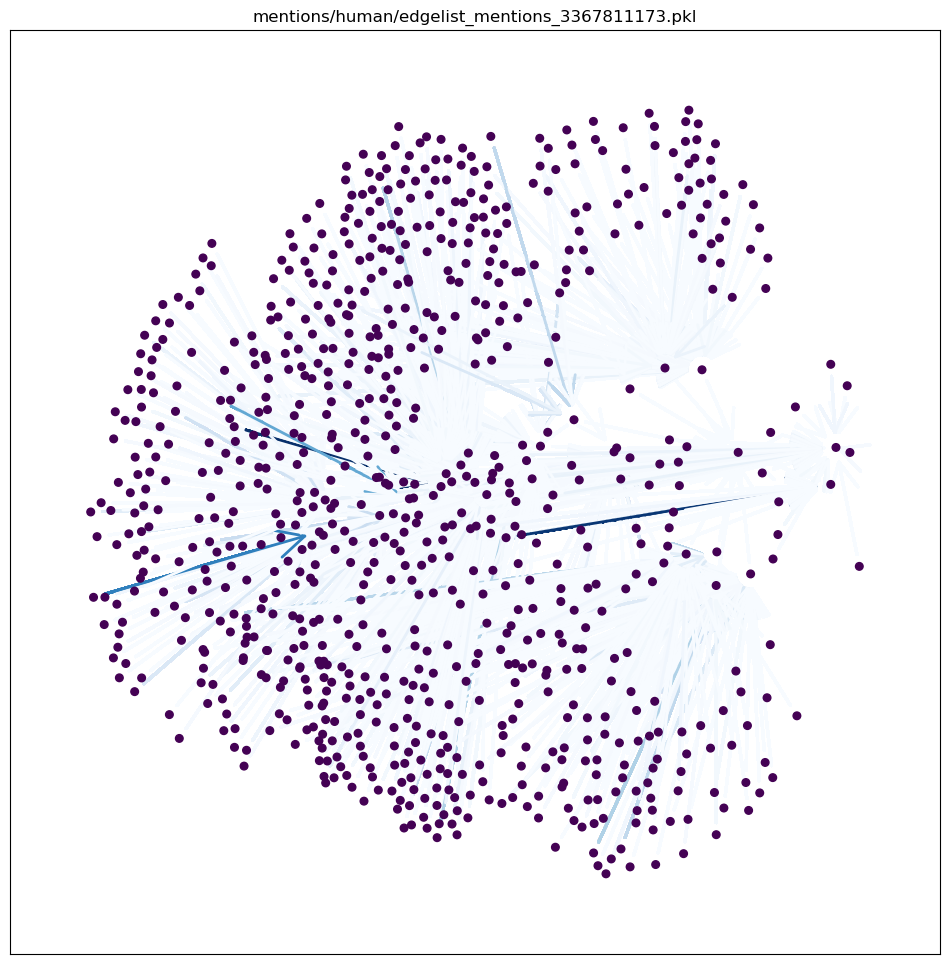

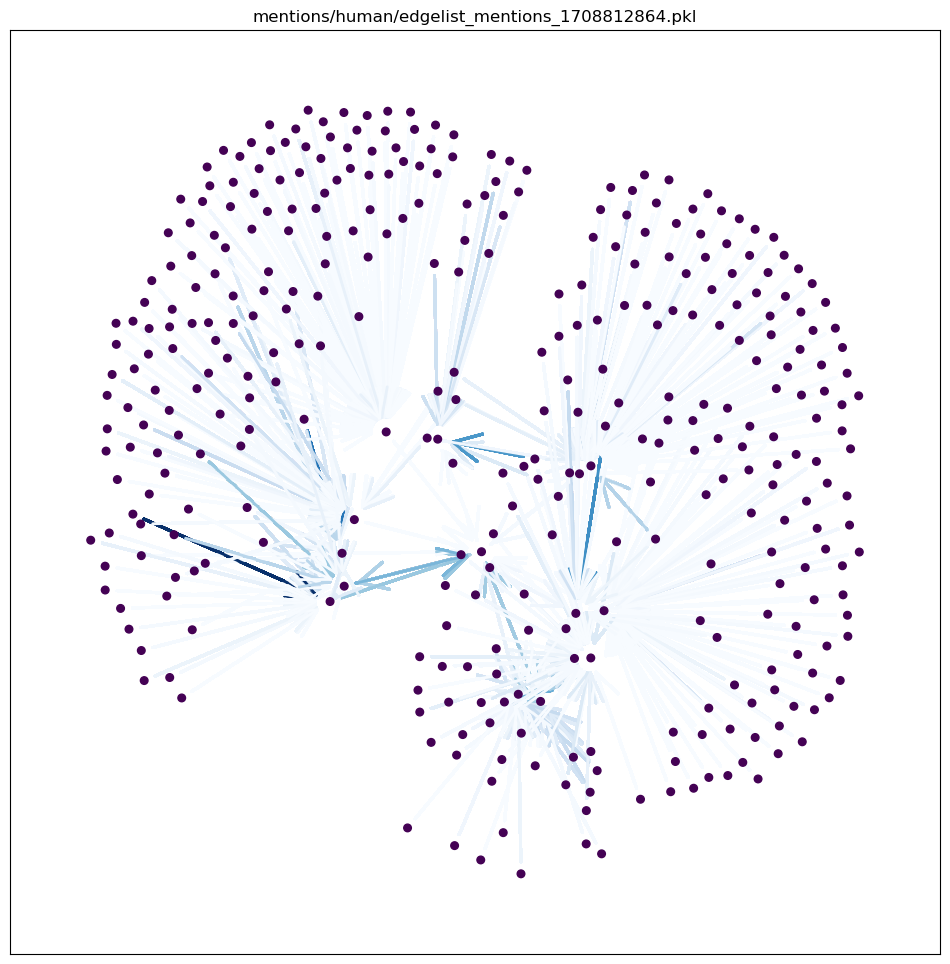

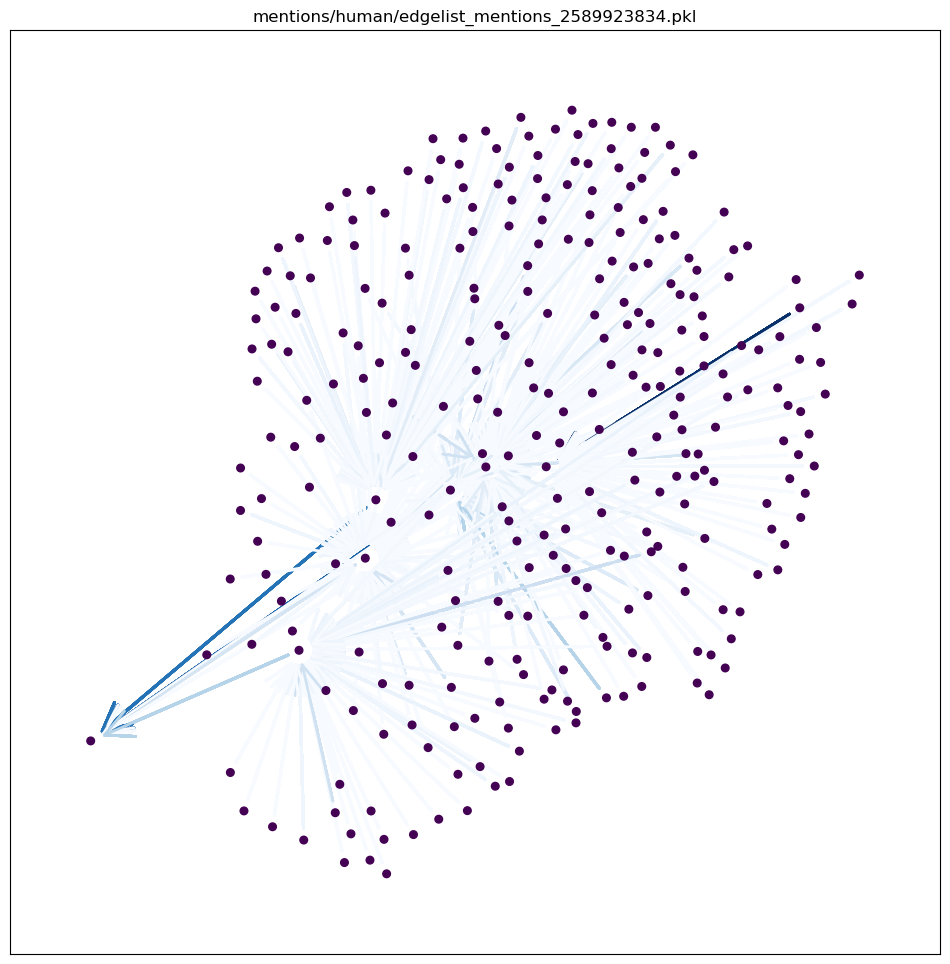

In [481]:
label = 'human'
print(label)
print('-----------------------')
for name in os.listdir('mentions/' + label)[0:5]:
    if os.path.isdir(name):
        continue
    path = 'mentions/' + label + '/' + name
    edgelist = pd.read_pickle(path)
    
    
    # Convert id from string to int
    edgelist.originating_id= edgelist.originating_id.astype(int) #.loc[edgelist.receiving_id == '844779426260791296']
    edgelist.receiving_id = edgelist.receiving_id.astype(int)

#     G = nx.convert_matrix.from_pandas_edgelist(edgelist, 'originating_id', 'receiving_id', 
#                                            create_using=nx.DiGraph())

    G = nx.convert_matrix.from_pandas_edgelist(edgelist, source='originating_id', 
                                           target='receiving_id', 
                                           edge_attr='edge_weight',
                                           create_using=nx.DiGraph())
    nodelist = list(G.nodes)
    
    rec = nx.algorithms.reciprocity(G)
    print(rec)
    print(path)
    try:
        plot_weighted_graph(G, nodelist)
        plt.title(path)
        #nx.draw_spring(G, node_color=node_labels, node_size=20)
    except:
        print('hello')

bot
-----------------------


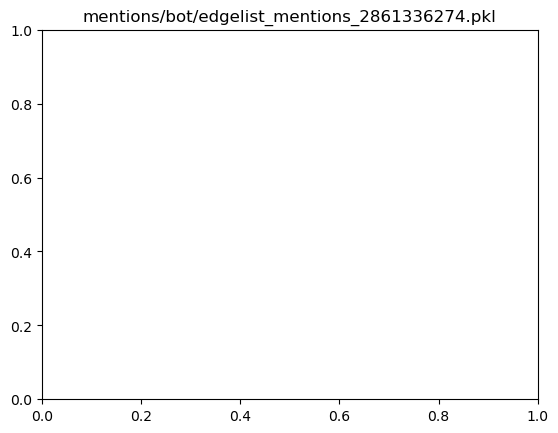

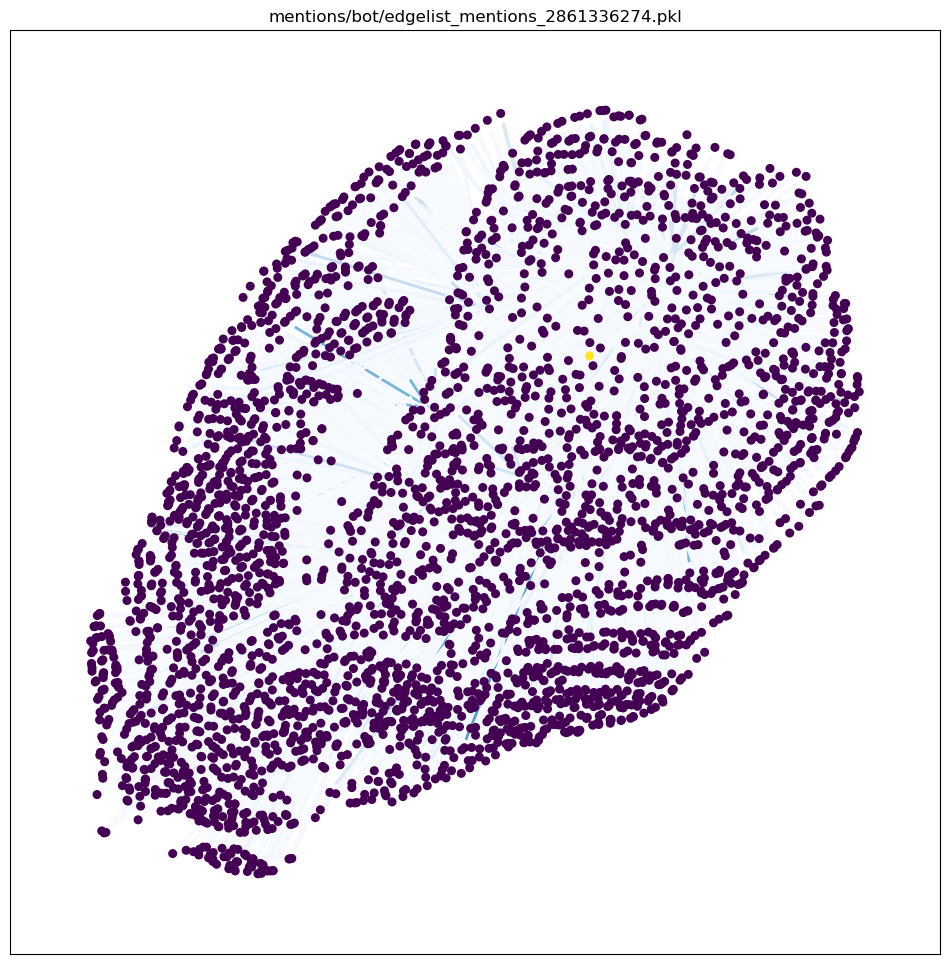

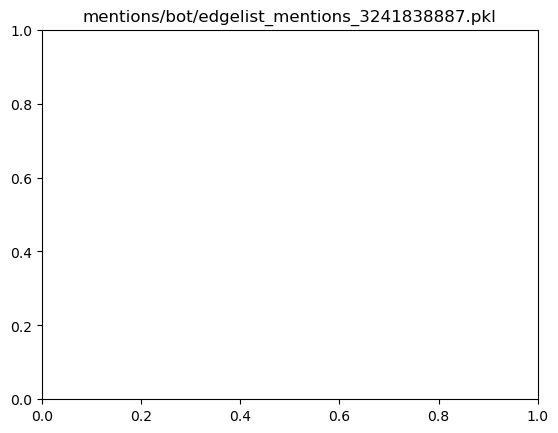

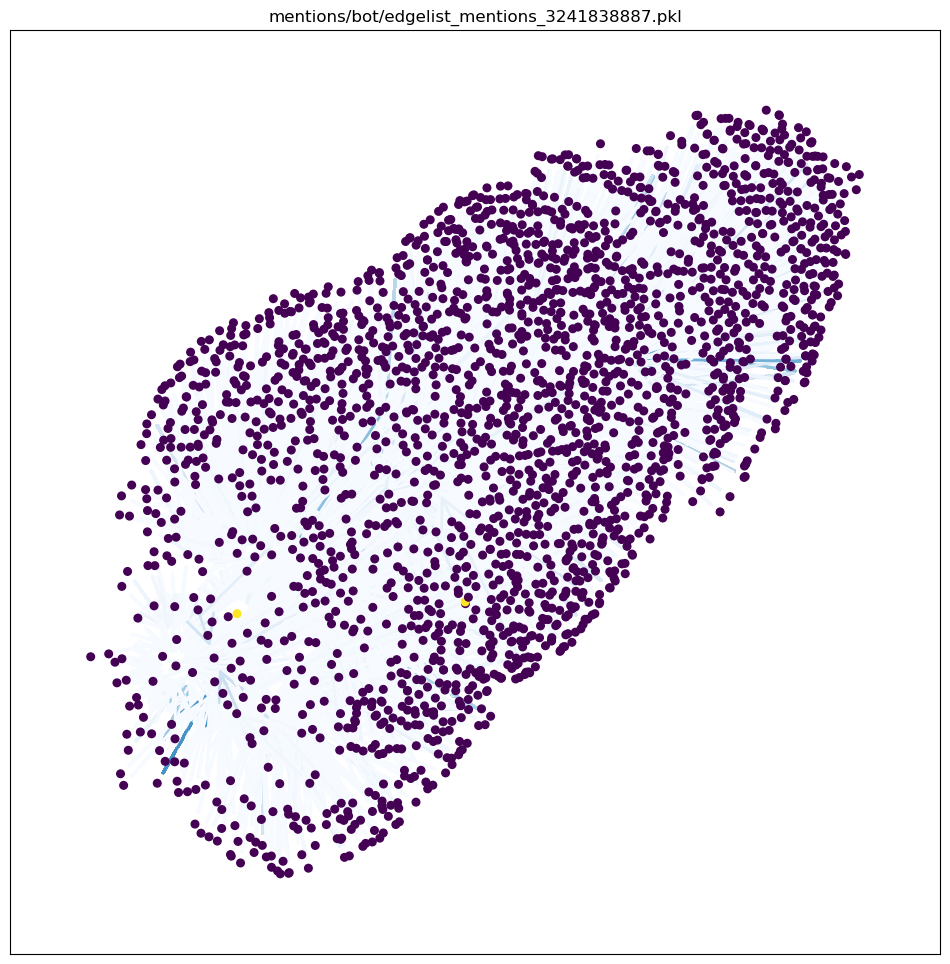

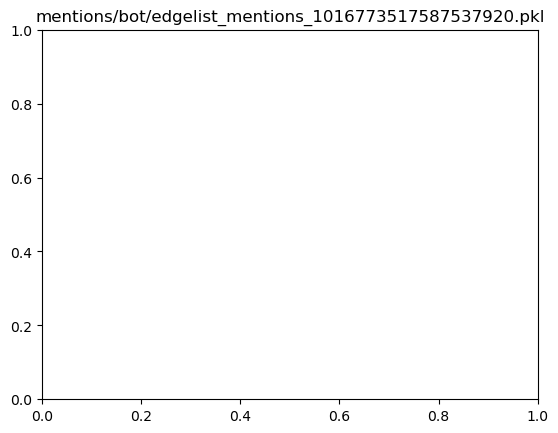

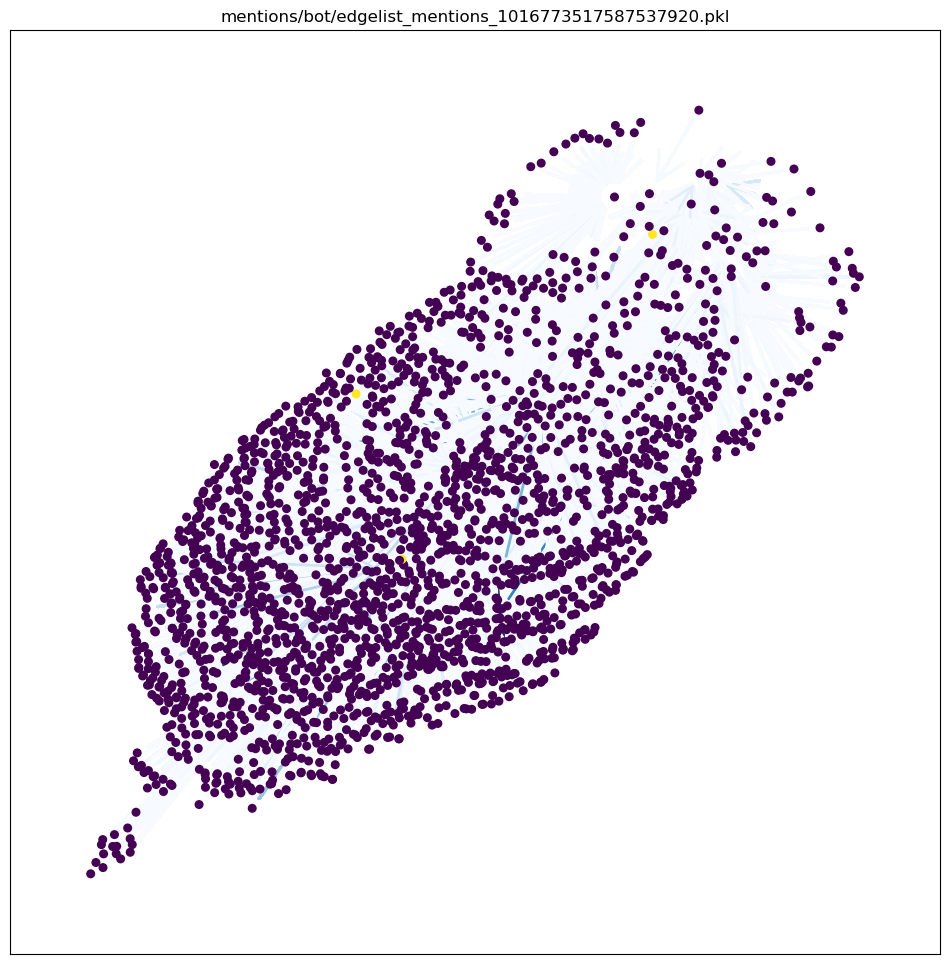

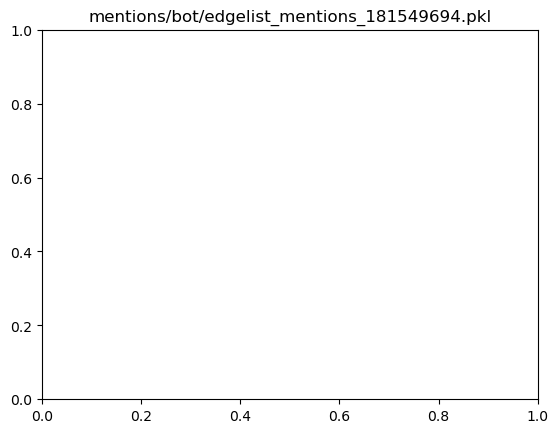

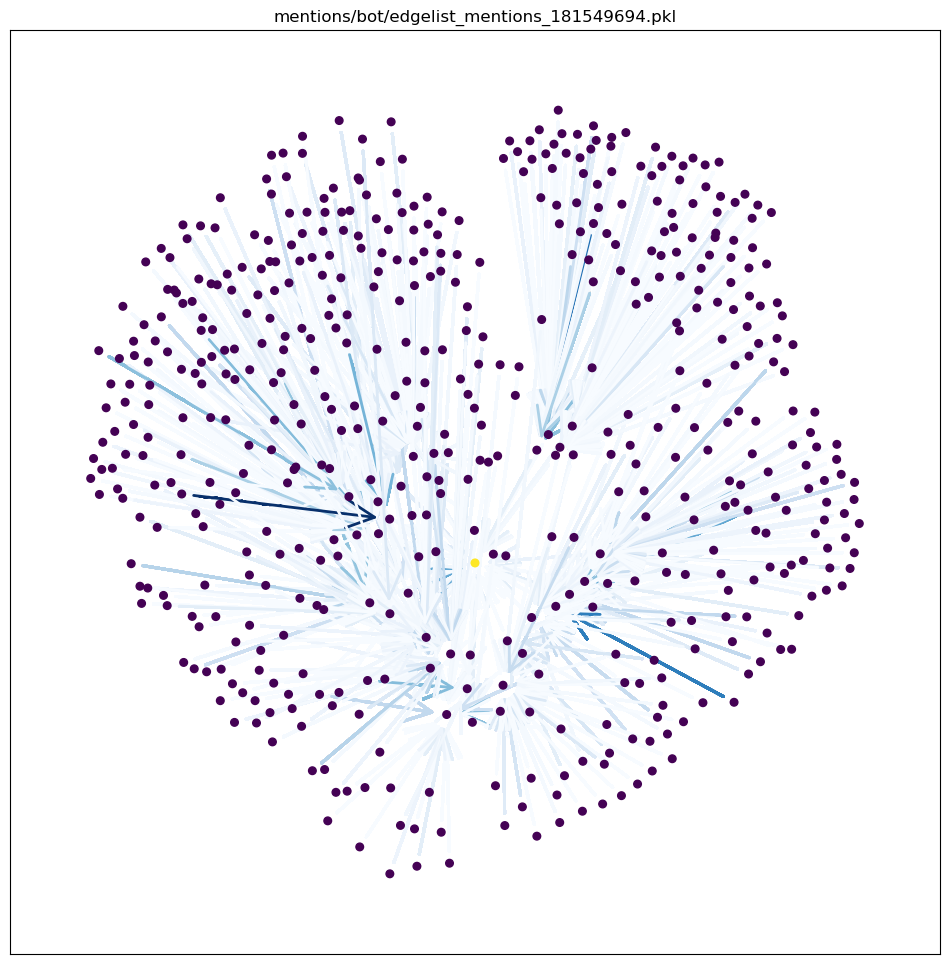

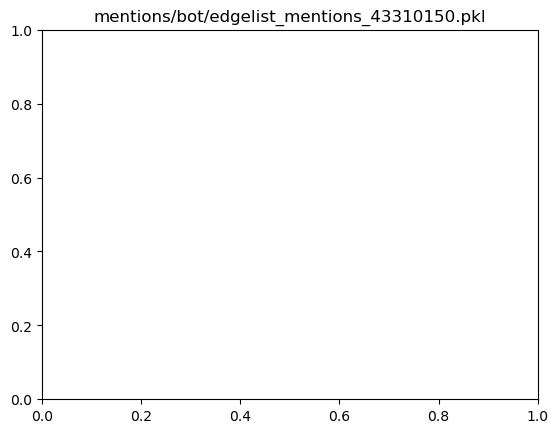

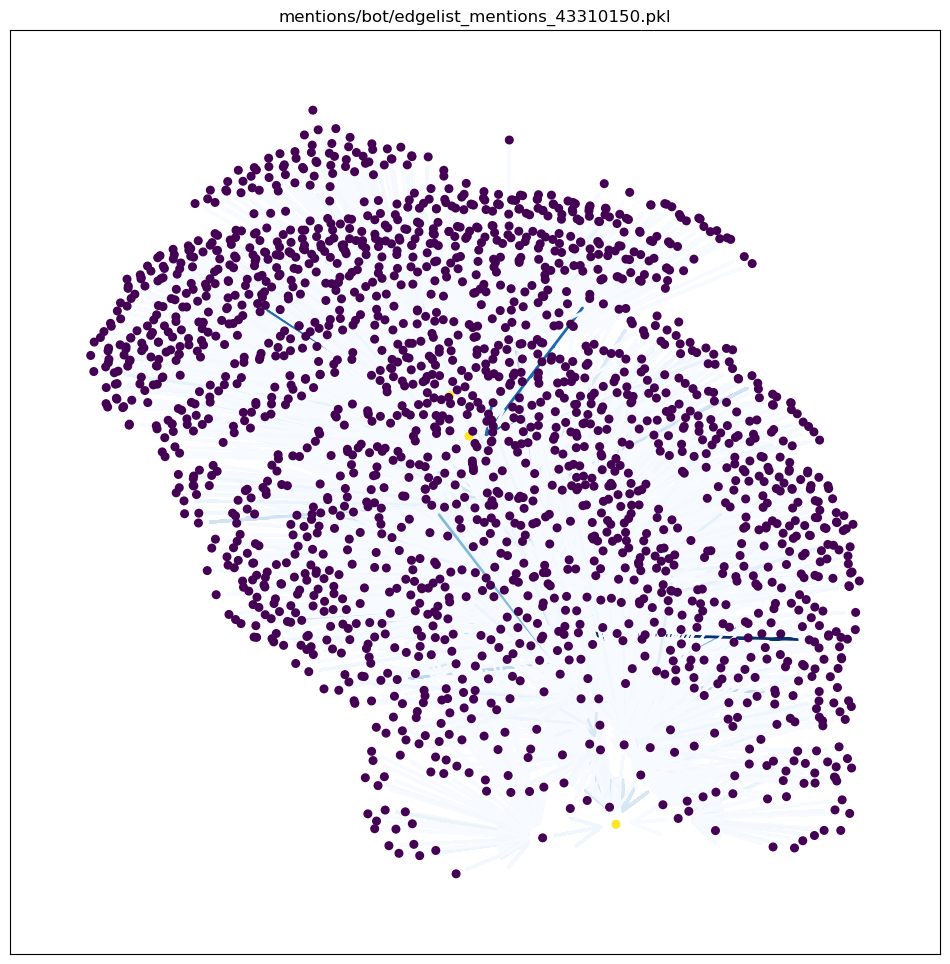

In [480]:
label = 'bot'
print(label)
print('-----------------------')
for name in os.listdir('mentions/' + label)[0:5]:
    if os.path.isdir(name):
        continue
    path = 'mentions/' + label + '/' + name
    edgelist = pd.read_pickle(path)
    
    
    # Convert id from string to int
    edgelist.originating_id= edgelist.originating_id.astype(int) #.loc[edgelist.receiving_id == '844779426260791296']
    edgelist.receiving_id = edgelist.receiving_id.astype(int)

#     G = nx.convert_matrix.from_pandas_edgelist(edgelist, 'originating_id', 'receiving_id', 
#                                            create_using=nx.DiGraph())

    G = nx.convert_matrix.from_pandas_edgelist(edgelist, source='originating_id', 
                                           target='receiving_id', 
                                           edge_attr='edge_weight',
                                           create_using=nx.DiGraph())
    nodelist = list(G.nodes)
    
    rec = nx.algorithms.reciprocity(G)
    print(path)
    try:
        plot_weighted_graph(G, nodelist)
        plt.title(path)
        #nx.draw_spring(G, node_color=node_labels, node_size=20)
    except:
        print('hello')

In [429]:
nx.draw_kamada_kawai(G, node_color=node_labels,)

KeyboardInterrupt: 

In [451]:
all_weights = []
for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['edge_weight']) 

In [470]:
len(np.array([G[u][v]['edge_weight'] for u, v in G.edges]))

2344

array([3, 3, 5, ..., 5, 3, 3])

In [479]:
def plot_weighted_graph(G, nodelist):
    node_labels = []
    for node in nodelist:
        if node in bots:
            node_labels.append(1)
        else:
            node_labels.append(0)
    
    plt.figure(figsize=(12,12))

    pos=nx.spring_layout(G) 
    nx.draw_networkx_nodes(G,pos, node_color=node_labels, node_size=30)

    all_weights = []
    for (node1,node2,data) in G.edges(data=True):
            all_weights.append(data['edge_weight']) #we'll use this when determining edge thickness

    unique_weights = list(set(all_weights))

    for weight in unique_weights:
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['edge_weight']==weight]
        width = weight+1
        edge_colors = np.array([G[u][v]['edge_weight'] for u, v in G.edges]) + 10
        nx.draw_networkx_edges(G,pos,
                               edge_cmap= plt.cm.Blues,
                               edge_color=edge_colors,
                               arrowstyle="->",
                               arrowsize=50,
                               width = 2)